In [1]:
# 한글 폰트 설치 및 적용
# fc-cache: succeeded 확인 후 [런타임 다시 시작] 할 것.
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,523 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120880 files and dire

In [1]:
#판다스 관련 라이브러리 가져오기
#as 별칭
import pandas as pd

#데이터를 데이터프레임 형태로 읽어오기
#프레임 -> 표
#행 -> 번호, 열 -> 이름, 값으로 이루어짐
df = pd.read_csv('태어난달기온.csv', encoding='cp949')

#기본 위에서 5줄만 보여준다
df.head()


,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi)
0,143,대구,2005-01-01,-1.8,-5.0,712,2.0,1441
1,143,대구,2005-01-02,1.4,-4.0,747,7.3,1455
2,143,대구,2005-01-03,5.5,-1.1,639,11.6,1353
3,143,대구,2005-01-04,-0.4,-3.6,2356,6.5,0
4,143,대구,2005-01-05,-1.1,-7.5,624,4.5,1509


In [2]:
#데이터프레임 개요 확인
df.info()

#최저기온, 최저기온 시간이 364개로 1개가 모자람.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             31 non-null     int64  
 1   지점명            31 non-null     object 
 2   일시             31 non-null     object 
 3   평균기온(°C)       31 non-null     float64
 4   최저기온(°C)       31 non-null     float64
 5   최저기온 시각(hhmi)  31 non-null     int64  
 6   최고기온(°C)       31 non-null     float64
 7   최고기온 시각(hhmi)  31 non-null     int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 2.1+ KB


In [3]:
#결측지 채우기 - 이전 행의 값과 같게 채움.
#df 원본 남기기
df2 = df.fillna(method='ffill')

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             31 non-null     int64  
 1   지점명            31 non-null     object 
 2   일시             31 non-null     object 
 3   평균기온(°C)       31 non-null     float64
 4   최저기온(°C)       31 non-null     float64
 5   최저기온 시각(hhmi)  31 non-null     int64  
 6   최고기온(°C)       31 non-null     float64
 7   최고기온 시각(hhmi)  31 non-null     int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 2.1+ KB


In [4]:
df2.rename(columns = {'평균기온(°C)' : '평균기온'}, inplace=True)
df2.rename(columns = {'최고기온(°C)' : '최고기온'}, inplace=True)
df2.rename(columns = {'최저기온(°C)' : '최저기온'}, inplace=True)

#위에서부터 3줄만 보여줘
df2.head(3)

,지점,지점명,일시,평균기온,최저기온,최저기온 시각(hhmi),최고기온,최고기온 시각(hhmi)
0,143,대구,2005-01-01,-1.8,-5.0,712,2.0,1441
1,143,대구,2005-01-02,1.4,-4.0,747,7.3,1455
2,143,대구,2005-01-03,5.5,-1.1,639,11.6,1353


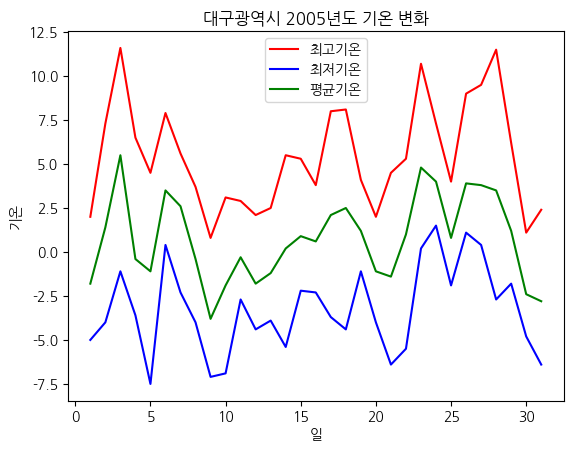

<Figure size 640x480 with 0 Axes>

In [7]:
#맷플롯립 관련 라이브러리 가져오기
import matplotlib.pyplot as plt

#글꼴 설정
plt.rc('font', family='NanumGothic')

#마이너스 기호가 깨지지 않도록 설정
plt.rcParams['axes.unicode_minus'] = False

#그래프으 제목 설정
plt.title('대구광역시 2005년도 기온 변화')

#선 그래프 그리기
#x축과 y축 설정. 범례, 컬러
plt.plot(range(1, len(df2)+1), df2['최고기온'], label='최고기온', c='r')
plt.plot(range(1, len(df2)+1), df2['최저기온'], label='최저기온', c='b')
plt.plot(range(1, len(df2)+1), df2['평균기온'], label='평균기온', c='g')

#x축과 y축 라벨 설정
plt.xlabel('일')
plt.ylabel('기온')

#범례 표시
plt.legend()

#그래프 화면에 표시
plt.show()

#파일로 저장
plt.savefig('2005대구기온.png')

In [8]:
#일시 데이터를 날짜형으로 변경
df2['일시'] = pd.to_datetime(df2['일시'], format='%Y-%m-%d')

df2['일시']

0    2005-01-01
1    2005-01-02
2    2005-01-03
3    2005-01-04
4    2005-01-05
5    2005-01-06
6    2005-01-07
7    2005-01-08
8    2005-01-09
9    2005-01-10
10   2005-01-11
11   2005-01-12
12   2005-01-13
13   2005-01-14
14   2005-01-15
15   2005-01-16
16   2005-01-17
17   2005-01-18
18   2005-01-19
19   2005-01-20
20   2005-01-21
21   2005-01-22
22   2005-01-23
23   2005-01-24
24   2005-01-25
25   2005-01-26
26   2005-01-27
27   2005-01-28
28   2005-01-29
29   2005-01-30
30   2005-01-31
Name: 일시, dtype: datetime64[ns]

In [9]:
#일시 열을 인덱스로 지정
#일시열을 각 행에서 교유하면서 순차로 증가하기 때문에 이 열을 인덱스로 지정하면 편리함.
df3 = df2.set_index('일시')

df3.head()

,지점,지점명,평균기온,최저기온,최저기온 시각(hhmi),최고기온,최고기온 시각(hhmi)
일시,,,,,,,
2005-01-01,143,대구,-1.8,-5.0,712,2.0,1441
2005-01-02,143,대구,1.4,-4.0,747,7.3,1455
2005-01-03,143,대구,5.5,-1.1,639,11.6,1353
2005-01-04,143,대구,-0.4,-3.6,2356,6.5,0
2005-01-05,143,대구,-1.1,-7.5,624,4.5,1509


In [11]:
# 1월 데이터만 추출
df_Mar = df3[pd.DatetimeIndex(df3.index).month == 1]

df_Mar

,지점,지점명,평균기온,최저기온,최저기온 시각(hhmi),최고기온,최고기온 시각(hhmi)
일시,,,,,,,
2005-01-01,143,대구,-1.8,-5.0,712,2.0,1441
2005-01-02,143,대구,1.4,-4.0,747,7.3,1455
2005-01-03,143,대구,5.5,-1.1,639,11.6,1353
2005-01-04,143,대구,-0.4,-3.6,2356,6.5,0
2005-01-05,143,대구,-1.1,-7.5,624,4.5,1509
2005-01-06,143,대구,3.5,0.4,711,7.9,1436
2005-01-07,143,대구,2.6,-2.3,2348,5.6,1350
2005-01-08,143,대구,-0.4,-4.0,723,3.7,1451
2005-01-09,143,대구,-3.8,-7.1,724,0.8,1436


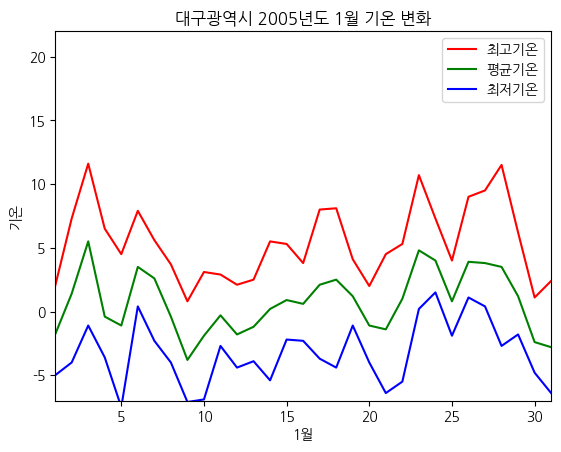

<Figure size 640x480 with 0 Axes>

In [12]:
#1월 기온의 선 그래프 생성
plt.title('대구광역시 2005년도 1월 기온 변화')

plt.plot(range(1,32), df_Mar['최고기온'], label = '최고기온', c = 'r')
plt.plot(range(1,32), df_Mar['평균기온'], label = '평균기온', c = 'g')
plt.plot(range(1,32), df_Mar['최저기온'], label = '최저기온', c = 'b')

plt.xlabel('1월')
plt.ylabel('기온')

#x축 범위
plt.xlim(1,31)
#y축 범위
plt.ylim(-7, 22)

plt.legend()

plt.show()

plt.savefig('대구1월기온.png')